In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

In [19]:
import pims
import pySPM as spm 
import trackpy as tp
import glob
from itertools import chain
from sxmreader import SXMReader

n_range = range(768, 770)
N = len(n_range)
SXM_PATH = ["electromigration_17/Image_{0:03}.sxm".format(i) for i in n_range]
frames = SXMReader(SXM_PATH)
molecule_size = 5
min_mass = 0.5
min_size = 0.5
max_ecc = 0.3
sep = 3


base_filename = "electromigration_17_{0:03}-{1:03}".format(n_range[0],n_range[-1])
OUTPUT = "./molecule_density_data/"

#print(frames[0])
    
#plt.imshow(frames[7])

In [22]:
f.groupby('frame').size()

frame
0    368
1    297
dtype: int64

Frame 1: 297 features
electromigration_17/Image_768.sxm


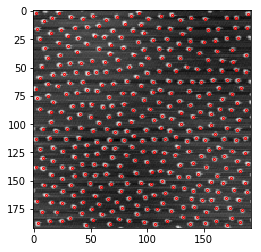

electromigration_17/Image_769.sxm


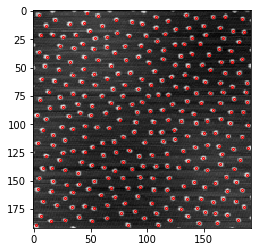

In [21]:
f = tp.batch(frames[:], molecule_size, separation=sep, minmass=0.3)
#tp.quiet()  # Turn off progress reports for best performance
plt.figure()

for i,frame in enumerate(frames):
    print(SXM_PATH[i])
    tp.annotate(f[f['frame']==i], frame, plot_style={'markersize': 1})

In [11]:
x = np.arange(-60, 70, 10)
SIZE = (frames.scan_size['real']['x'] * 1e2) * (frames.scan_size['real']['y'] * 1e2)
#f1 = f.groupby('frame').size().reindex(range(N), fill_value=0) / SIZE
#f2 = f.groupby('frame').size().reindex(range(N), fill_value=0) / SIZE
f1 = f.groupby('frame').size().reindex(range(N), fill_value=0)[0:13].iloc[::1] / SIZE
f2 = f.groupby('frame').size().reindex(range(N), fill_value=0)[13:26].iloc[::-1] / SIZE
f3 = f.groupby('frame').size().reindex(range(N), fill_value=0)[26:39].iloc[::1] / SIZE
f4 = f.groupby('frame').size().reindex(range(N), fill_value=0)[39:52].iloc[::-1] / SIZE
#f3 = f.groupby('frame').size().reindex(range(N), fill_value=0)[25:50].iloc[::-1] / SIZE
#f4 = f.groupby('frame').size().reindex(range(N), fill_value=0)[50:75] / SIZE
#x2 = [i for i in range(60, -65, -10)]
#SIZE2 = (100 * 1e-7)**2
#g1 = f.groupby('frame').size()[101:114] / SIZE2
#g2 = f.groupby('frame').size()[114:127].iloc[::-1] / SIZE2
#g3 = f.groupby('frame').size()[127:140] / SIZE2
#f4 = f.groupby('frame').size()[140:153].iloc[::-1] / SIZE

./molecule_density_data/electromigration_17_909-960.png


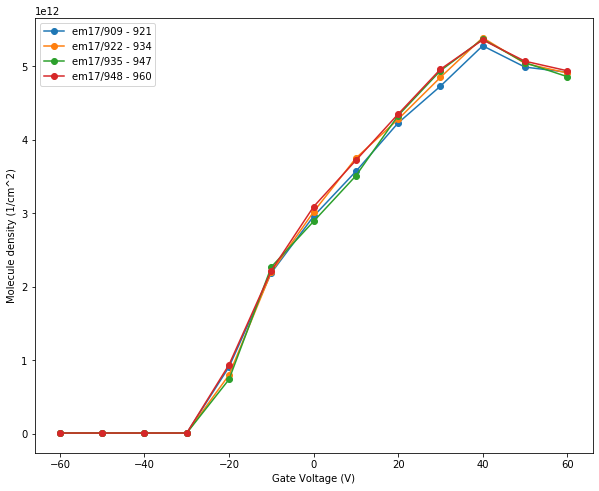

In [34]:
plt.figure(figsize=(10,8))
plt.plot(x[::-1], f1,'o-',label='em17/909 - 921')
plt.plot(x[::-1], f2,'o-',label='em17/922 - 934')
plt.plot(x[::-1], f3,'o-',label='em17/935 - 947')
plt.plot(x[::-1], f4,'o-',label='em17/948 - 960')

#plt.plot(x, f3,'o-',label='3, up')
#plt.plot(x[:12], f4,'o-',label='4, down')
#plt.plot(x, f5,'o-',label='5, down')
plt.legend()
#plt.plot(x2, g1)
#plt.plot(x2, g2)
#plt.plot(x2, g3)
#plt.plot(x2, g4)
# plt.title(SXM_PATH[0] + " to {}".format(n_range[-1]))
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Molecule density (1/cm^2)')
plt.savefig(OUTPUT + base_filename+'.png')
print(OUTPUT + base_filename+'.png')

In [51]:
#from numpy import savetxt
#base_filename = "molecule_density_data/electromigration_13_616-640"
#savetxt(base_filename+'.csv', np.column_stack([x, f1, f2]), delimiter=',')

In [ ]:
range(48)

In [ ]:
N

In [ ]:
f1

In [ ]:
f1+[0,41,49,50,42,30,8,1,1,0,0,0,0]

In [ ]:
times = [0,1,1,5,5,10,10,10,10,30,30,30,50,100,180]
uncounted=[0,41,49,50,42,30,8,1,1,0,0,0,0,0,0]
ctimes = np.cumsum(times)
plt.semilogx(ctimes,(f1+uncounted)/SIZE,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
times = range(N)
plt.plot(times,f1,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
len(f1)

In [ ]:
times = np.arange(0.5,19,0.5)
ctimes = np.cumsum(times)
plt.plot(ctimes,f1,'o-')
plt.xlabel('cumulative time (s)')
plt.ylabel('molecule density ($cm^{-2}$)')

In [ ]:
f1*SIZE